In [115]:
import pandas as pd
import numpy as np



In [116]:
df = pd.read_csv('train.csv')
articles = df['Text']

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

def calculate_word_frequency(documents):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
    return word_freq

In [118]:
def vectorize_articles(articles, vectorizer=None):
    if vectorizer is None:
        vectorizer = CountVectorizer()
        vectorizer.fit(articles)
    
    article_vectors = vectorizer.transform(articles)
    return article_vectors.toarray(), vectorizer

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text'])
y = df['Category']

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = 2
knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
knn.fit(X, y)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [121]:
test_df = pd.read_csv("test.csv")
test_articles = test_df['Text']
test_X = vectorizer.transform(test_articles).toarray()
test_y = test_df['Category'].to_numpy()
y_pred = knn.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9905660377358491


c:\Users\rukun\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


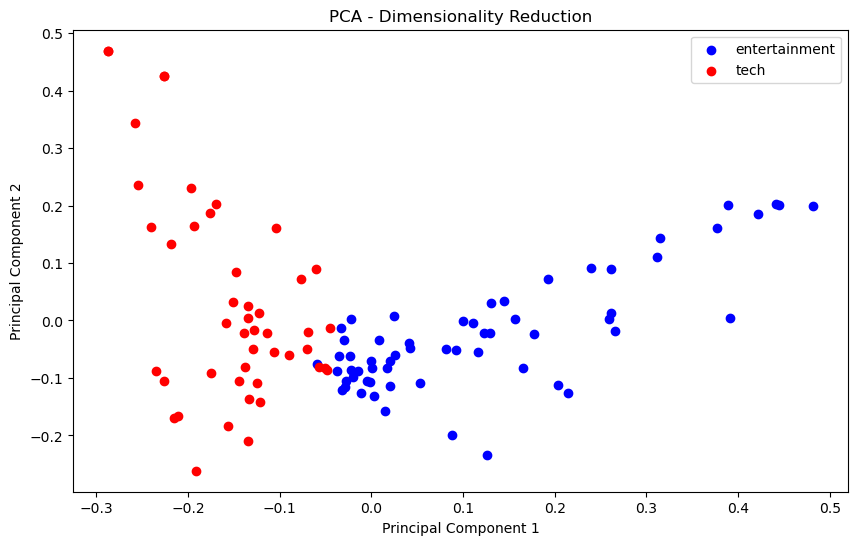

In [122]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2) 
X_reduced = pca.fit_transform(test_X)
df_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_reduced['category'] = y_pred

plt.figure(figsize=(10, 6))
categories = np.unique(y_pred)
colors = ['blue', 'red']

for category, color in zip(categories, colors):
    indices = df_reduced['category'] == category
    plt.scatter(df_reduced.loc[indices, 'PC1'], df_reduced.loc[indices, 'PC2'], c=color, label=category)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA - Dimensionality Reduction')
plt.show()

In [123]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

encoded_categories = encoder.fit_transform(df['Category'])
len(encoded_categories) 

encoded_predictions = encoder.transform(y_pred)

c:\Users\rukun\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\rukun\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy: 0.9716981132075472


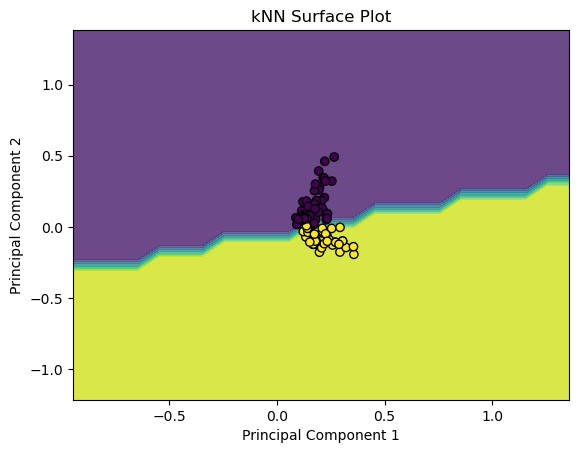

In [124]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import issparse
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
if issparse(X):
    svd = TruncatedSVD(n_components=2)
    X_train_reduced = svd.fit_transform(X)
    X_test_reduced = svd.transform(test_X)
else:
    pca = PCA(n_components=2)
    X_train_reduced = pca.fit_transform(X)
    X_test_reduced = pca.transform(test_X)


    

k = 100# Number of neighbors
distance_metric = 'euclidean'  # Distance metric
new_knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
new_knn.fit(X_train_reduced, encoded_categories)
# print(X_test_reduced)
new_knn.predict(X_test_reduced)
accuracy = accuracy_score(encoded_predictions, new_knn.predict(X_test_reduced))
print(f"Accuracy: {accuracy}")

# Generate grid points for surface plot
x_min, x_max = X_train_reduced[:, 0].min() - 1, X_train_reduced[:, 0].max() + 1
y_min, y_max = X_train_reduced[:, 1].min() - 1, X_train_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = new_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the surface plot
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=encoded_predictions, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('kNN Surface Plot')
plt.show()